# Aggregations: Min, Max and everything between

### Start 01/15/2018

Aggregation functions to get an overview of the data you have using calculations like:
- Mean
- Standard deviation
- median
- minimum
- maximum
- quantiles


All of these can be done using built-in numpy functions

## Summing values
``np.sum(x)`` is actually much faster than python's built-in ``sum(x)``

In [1]:
import numpy as np

In [2]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

112 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
665 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


``np.sum`` has differnt optional arguments than python's version

## Min and Max

In [4]:
#Python's built-in funcs
min(big_array), max(big_array)

(2.3365171463174406e-06, 0.9999990378467043)

In [5]:
#Numpy's funcs
np.min(big_array), np.max(big_array)

(2.3365171463174406e-06, 0.9999990378467043)

In [6]:
%timeit min(big_array)
%timeit np.min(big_array)

41.6 ms ± 84.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
332 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
#like any class method, you can do func(obj) or obj.func
print(big_array.min(), big_array.max(), big_array.sum())

2.33651714632e-06 0.999999037847 500204.150462


In [9]:
M = np.random.random((3, 4))
print(M)

[[ 0.21775602  0.07735229  0.71240664  0.60321271]
 [ 0.78020049  0.78882484  0.91261108  0.42008078]
 [ 0.45991282  0.8300445   0.7990624   0.04206089]]


In [10]:
# default numpy aggregation functions operate over the entire array
np.sum(M) # = 1 value

6.6435254625051536

In [11]:
# if you want column or row wise returns, specify that as second argument
np.sum(M, axis = 0) # column sum, add along dimension 0

array([ 1.45786932,  1.69622163,  2.42408012,  1.06535439])

In [13]:
np.sum(M, axis = 1) # row sum, add elements along dimension 1 (element from each column)

array([ 1.61072766,  2.90171719,  2.13108061])

In [14]:
print(M.min(axis = 0), M.min(axis = 1))
print(M.max(axis = 0), M.max(axis = 1))

[ 0.21775602  0.07735229  0.71240664  0.04206089] [ 0.07735229  0.42008078  0.04206089]
[ 0.78020049  0.8300445   0.91261108  0.60321271] [ 0.71240664  0.91261108  0.8300445 ]


The ``axis = `` argument matches the syntax of Matlab, other than the index starting at 1. ``sum(M, 1)`` in matlab returns a sum of each column (every element along dimension 1 was summed) and ``sum(M, 2)`` in matlab returns the sum of every row. The difference with matlab is that ``sum(M) = sum(M, 1)``, it doesn't return a single value.

Many of NumPy's built-in aggregation functions have a 'NaN-safe' counterpart, like ``np.sum`` and ``np.nansum``. This allows you to compute a sum while ignoring NaN values.

### Useful numpy aggregate functions, NaN versions, and descriptions

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

## Example: avg height of US presidents
uses some Pandas, to be explained more later

In [25]:
!head -4 data/president_heights.csv
# this is a bash command, and will not work when running jupyter notebook from anaconda on windows
# it was being used to show the first 3 lines of the csv file

'head' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [27]:
data[1:4]

,order,name,height(cm)
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163


In [28]:
print("Mean height:      ", heights.mean())
print("Standard dev:     ", heights.std())
print("Min height:       ", heights.min())
print("Max height:       ", heights.max())

Mean height:       179.738095238
Standard dev:      6.93184344275
Min height:        163
Max height:        193


In [29]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #setting plot style

Text(0,0.5,'number')

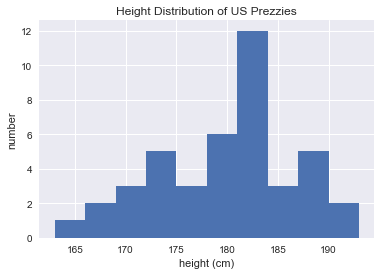

In [31]:
plt.hist(heights)
plt.title("Height Distribution of US Prezzies")
plt.xlabel("height (cm)")
plt.ylabel("number")

## Finished 1/16/2018